Milestone 1<br>
Nama: Risqi Wahyu Permana<br>
Batch: HCK 6

# Link Dashboard
<https://lookerstudio.google.com/reporting/24efbfbb-d151-46a2-b141-a853ad799f20>

# Objective

**Problem Statement:** Menganalisis hubungan apakah product score dari suatu barang mempengaruhi penjualan produk tersebut.
**Poin Penjabaran:**
1. Produk dari kategori apa yang paling banyak dibeli?
2. Berapa total pendapatan dari setiap kategori?
3. Berapakah Rata - rata product score berdasarkan kategorinya?
4. Berapa total penjualan produk berdasarkan produk scorenya?
5. Apakah produk score yang tinggi mempengaruhi penjualan sebuah produk? (korelasi)?
6. Apakah produk dengan products score tertinggi memiliki perbedaan rata - rata total penjualan dengan produk yang memiliki product score rendah?

# Working Area

## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Loading

Data diambil dari kaggle
<https://www.kaggle.com/code/harshsingh2209/retail-price-optimization>

In [2]:
df = pd.read_csv('retail_price.csv')
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


## Data Cleaning

In [3]:
#Take data only needed
df_retail_price = df[['product_id','product_category_name','month_year','qty','total_price', 'product_score']]
df_retail_price.head()

,product_id,product_category_name,month_year,qty,total_price,product_score
0,bed1,bed_bath_table,01-05-2017,1,45.95,4.0
1,bed1,bed_bath_table,01-06-2017,3,137.85,4.0
2,bed1,bed_bath_table,01-07-2017,6,275.70,4.0
3,bed1,bed_bath_table,01-08-2017,4,183.80,4.0
4,bed1,bed_bath_table,01-09-2017,2,91.90,4.0


In [4]:
df_retail_price.sample(10)

,product_id,product_category_name,month_year,qty,total_price,product_score
111,cool5,cool_stuff,01-09-2017,6,599.94,4.3
45,garden7,garden_tools,01-08-2017,6,359.40,4.2
249,garden8,garden_tools,01-08-2018,7,973.00,4.2
151,computers5,computers_accessories,01-12-2017,2,239.80,3.5
441,bed2,bed_bath_table,01-05-2017,58,5214.20,3.9
10,bed1,bed_bath_table,01-03-2018,17,679.83,4.0
590,computers4,computers_accessories,01-10-2017,17,2629.83,4.2
532,furniture1,furniture_decor,01-04-2018,17,595.00,3.7
533,furniture1,furniture_decor,01-05-2018,11,385.00,3.7
229,health1,health_beauty,01-10-2017,3,254.97,3.8


In [5]:
#check info
df_retail_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             676 non-null    object 
 1   product_category_name  676 non-null    object 
 2   month_year             676 non-null    object 
 3   qty                    676 non-null    int64  
 4   total_price            676 non-null    float64
 5   product_score          676 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 31.8+ KB


In [6]:
#convert month_year to datetime
df_retail_price['month_year'] = pd.to_datetime(df_retail_price['month_year'])
df_retail_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             676 non-null    object        
 1   product_category_name  676 non-null    object        
 2   month_year             676 non-null    datetime64[ns]
 3   qty                    676 non-null    int64         
 4   total_price            676 non-null    float64       
 5   product_score          676 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 31.8+ KB


/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_23784/4286909164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail_price['month_year'] = pd.to_datetime(df_retail_price['month_year'])


In [7]:
#rename column month_year to order_date
df_retail_price.rename(columns={'month_year':'order_date'}, inplace=True)
df_retail_price.head()

/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_23784/1894442581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail_price.rename(columns={'month_year':'order_date'}, inplace=True)


,product_id,product_category_name,order_date,qty,total_price,product_score
0,bed1,bed_bath_table,2017-01-05,1,45.95,4.0
1,bed1,bed_bath_table,2017-01-06,3,137.85,4.0
2,bed1,bed_bath_table,2017-01-07,6,275.70,4.0
3,bed1,bed_bath_table,2017-01-08,4,183.80,4.0
4,bed1,bed_bath_table,2017-01-09,2,91.90,4.0


In [8]:
#year
df_retail_price['year'] = df_retail_price['order_date'].dt.year

/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_23784/3991846570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail_price['year'] = df_retail_price['order_date'].dt.year


In [9]:
#export to csv df_retail_price
df_retail_price.to_csv('df_retail_price.csv', index=False)

In [10]:
#check missing value
df_retail_price.isnull().sum()

product_id               0
product_category_name    0
order_date               0
qty                      0
total_price              0
product_score            0
year                     0
dtype: int64

In [11]:
#check duplicate value
df_retail_price.duplicated().sum()

0

In [12]:
#product_id unique
df_retail_price['product_id'].unique()

array(['bed1', 'garden5', 'consoles1', 'garden7', 'health9', 'cool4',
       'health3', 'perfumery1', 'cool5', 'health8', 'garden4',
       'computers5', 'garden10', 'computers6', 'health6', 'garden6',
       'health10', 'watches2', 'health1', 'garden8', 'garden9',
       'watches6', 'cool3', 'perfumery2', 'cool2', 'computers1',
       'consoles2', 'health5', 'watches8', 'furniture4', 'watches5',
       'health7', 'bed3', 'garden3', 'bed2', 'furniture3', 'watches4',
       'watches3', 'furniture2', 'garden2', 'furniture1', 'health2',
       'garden1', 'cool1', 'computers4', 'watches7', 'computers3',
       'health4', 'watches1', 'computers2', 'bed4', 'bed5'], dtype=object)

## Problem 1
1. Produk dari kategori apa yang paling banyak dibeli?


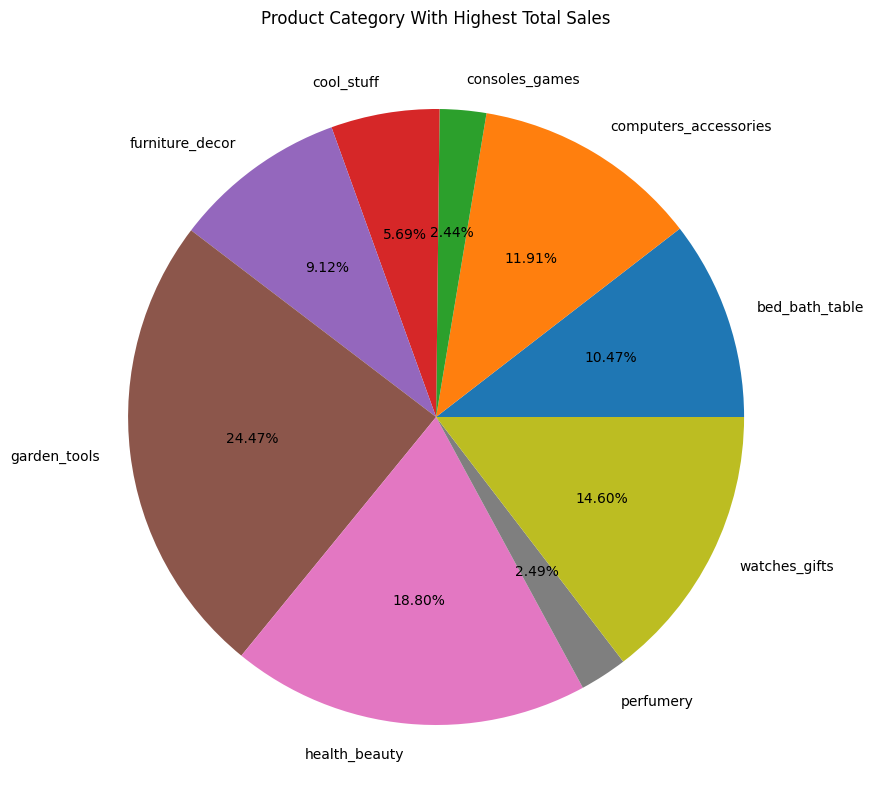

In [13]:
#Make pie chart product with highest sales
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.pie(df_retail_price.groupby('product_category_name')['qty'].sum(), labels=df_retail_price.groupby('product_category_name')['qty'].sum().index, autopct='%.2f%%')
plt.title('Product Category With Highest Total Sales')
plt.show()

In [14]:
#product_id unique
df_retail_price['product_id'].unique()

array(['bed1', 'garden5', 'consoles1', 'garden7', 'health9', 'cool4',
       'health3', 'perfumery1', 'cool5', 'health8', 'garden4',
       'computers5', 'garden10', 'computers6', 'health6', 'garden6',
       'health10', 'watches2', 'health1', 'garden8', 'garden9',
       'watches6', 'cool3', 'perfumery2', 'cool2', 'computers1',
       'consoles2', 'health5', 'watches8', 'furniture4', 'watches5',
       'health7', 'bed3', 'garden3', 'bed2', 'furniture3', 'watches4',
       'watches3', 'furniture2', 'garden2', 'furniture1', 'health2',
       'garden1', 'cool1', 'computers4', 'watches7', 'computers3',
       'health4', 'watches1', 'computers2', 'bed4', 'bed5'], dtype=object)

### Insight
Dari data dan grafik di atas dapat dilihat produk dari kategori `garden tool` memiliki jumlah penjualan terbanyak. Hal ini di pengaruhi karena pada setiap kategori memiliki `jumlah item produk` yang berbeda. Di sini kategori dari `garden tool` memiliki item produk sebanyak 10 item.

## Problem 2
2. Berapa total pendapatan dari setiap kategori?

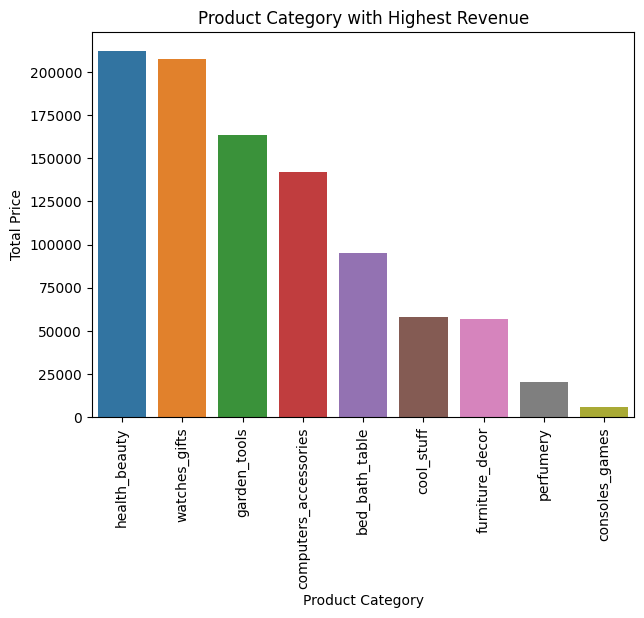

In [15]:
#Barplot product with highest revenue use seaborn
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot()
sns.barplot(x=df_retail_price.groupby('product_category_name')['total_price'].sum().sort_values(ascending=False).index, y=df_retail_price.groupby('product_category_name')['total_price'].sum().sort_values(ascending=False))
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Total Price')
plt.title('Product Category with Highest Revenue')
plt.show()

### Insight
walaupun kategori `garden tools` memiliki `penjualan terbanyak`, namun `pendapatan terbanyak` didapatkan dari kategori `health_beauty` dengan `penjualan produk terbanyak` pada posisi `dua` dan `pendapatan terbanyak ke-dua` adalah kategori `watches_gifts` dengan `penjualan produk terbanyak` pada posisi `ke-tiga`.

## Problem 3
3. Berapakah Rata - rata product score berdasarkan kategorinya?

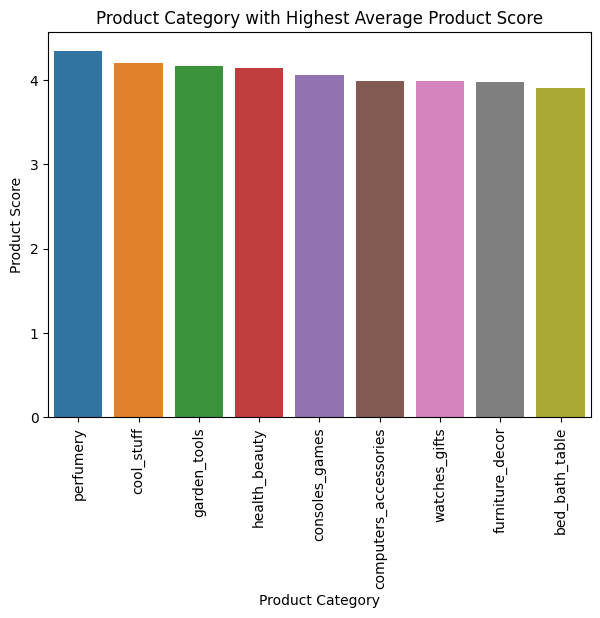

In [16]:
#product category with highest product average score
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot()
sns.barplot(x=df_retail_price.groupby('product_category_name')['product_score'].mean().sort_values(ascending=False).index, y=df_retail_price.groupby('product_category_name')['product_score'].mean().sort_values(ascending=False))
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Product Score')
plt.title('Product Category with Highest Average Product Score')
plt.show()

### Insight
Dari grafik di atas dapat dilihat rata - rata product score dari masing - masing kategori. Namun apakah produk score yang tinggi berarti produk yang terjual juga banyak?

## Problem 4 dan 5
4. Berapa total penjualan produk berdasarkan produk scorenya?
5. Apakah produk score yang tinggi mempengaruhi penjualan sebuah produk? (korelasi)?

In [17]:
df_scatter = df_retail_price.groupby('product_id')['qty','product_score'].agg(['sum','mean'])
df_scatter

/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_23784/449184820.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_scatter = df_retail_price.groupby('product_id')['qty','product_score'].agg(['sum','mean'])


qty            product_score     
            sum       mean           sum mean
product_id                                   
bed1        143   8.937500          64.0  4.0
bed2        487  25.631579          74.1  3.9
bed3        111  10.090909          36.3  3.3
bed4        131  13.100000          42.0  4.2
bed5        154  30.800000          22.0  4.4
computers1  139   9.266667          60.0  4.0
computers2  183  18.300000          35.0  3.5
computers3  103  10.300000          42.0  4.2
computers4  341  18.944444          75.6  4.2
computers5  127  15.875000          28.0  3.5
computers6  274  34.250000          34.4  4.3
consoles1   142  11.833333          50.4  4.2
consoles2    97   9.700000          39.0  3.9
cool1       120   8.000000          63.0  4.2
cool2       119   9.153846          55.9  4.3
cool3       114  16.285714          30.8  4.4
cool4       108  12.000000          34.2  3.8
cool5        97   7.461538          55.9  4.3
furniture1  169  13.000000          48.1  3.7
furniture2  527  40.538462          53.3  4.1
furniture3   97   8.083333          45.6  3.8
furniture4  101  10.100000          44.0  4.4
garden1     148   8.222222          77.4  4.3
garden10    391  24.437500          67.2  4.2
garden2     127   7.470588          73.1  4.3
garden3     141   7.833333          73.8  4.1
garden4     388  27.714286          57.4  4.1
garden5     113   8.071429          57.4  4.1
garden6     484  30.250000          65.6  4.1
garden7     115   7.187500          67.2  4.2
garden8     118   8.428571          58.8  4.2
garden9     373  21.941176          68.0  4.0
health1     122  13.555556          34.2  3.8
health10    155  22.142857          29.4  4.2
health2     195  15.000000          54.6  4.2
health3     156  19.500000          32.8  4.1
health4     137  12.454545          49.5  4.5
health5     156   7.800000          86.0  4.3
health6     150  21.428571          27.3  3.9
health7     231  11.550000          78.0  3.9
health8     259  15.235294          69.7  4.1
health9     281  15.611111          77.4  4.3
perfumery1  138  10.615385          55.9  4.3
perfumery2  106   8.153846          57.2  4.4
watches1    194  11.411765          64.6  3.8
watches2    146   9.733333          60.0  4.0
watches3    160  10.666667          58.5  3.9
watches4    225  22.500000          42.0  4.2
watches5    143  14.300000          41.0  4.1
watches6    323  23.071429          58.8  4.2
watches7    123  10.250000          44.4  3.7
watches8    117  11.700000          41.0  4.1

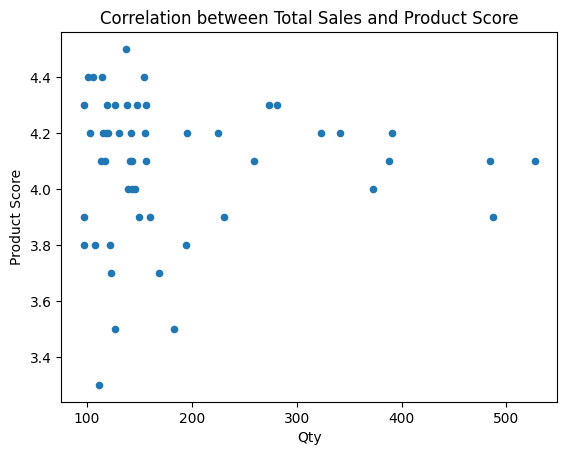

In [18]:
df_scatter.plot(kind='scatter',x=('qty','sum'),y=('product_score','mean'))
plt.title('Correlation between Total Sales and Product Score')
plt.xlabel('Qty')
plt.ylabel('Product Score')
plt.show()

### Insight
4. Problem 4
- Dari scatter plot di atas dapat terlihat produk dengan jumlah penjualan tertinggi dengan total penjualan di atas 200 qty berada pada rentang product score 3,9 sampai 4,3.
5. Problem 5
- Dari scatter plot itu juga dapa dilihat bahwa `hubungan antara product score dengan jumlah barang yang tejual` memiliki `hubungan yang renggang`. Produk dengan `produk score` yang `tinggi` tidak selalu memiliki `total penjualan yang tinggi`, walaupun dapat dilihat produk pada rentang product score 3,9 sampai 4,3 yang dimana produk scorenya termasuk agak tinggi memiliki jumlah penjualan yang lebih banyak dibandingkan produk score di bawahnya.
- Dapat dilihat juga `persebaran produk` berdasarkan `produk score` tersebar pada rentang `3,8` sampai `4,4`.

## Problem 6
6. Apakah produk dengan products score tertinggi memiliki perbedaan rata - rata total penjualan dengan produk yang memiliki product score rendah?

In [19]:
#shape
df_retail_price.value_counts().shape

(676,)

Mengambil data sample sebanyak 300 data

In [20]:
#take sample 300 data
df_sample = df_retail_price.sample(300)
df_sample

,product_id,product_category_name,order_date,qty,total_price,product_score,year
588,computers4,computers_accessories,2017-01-08,7,1019.93,4.2,2017
315,computers1,computers_accessories,2017-01-06,6,611.40,4.0,2017
246,garden8,garden_tools,2018-01-05,3,537.00,4.2,2018
177,computers6,computers_accessories,2018-01-04,35,5246.50,4.3,2018
64,health9,health_beauty,2017-01-08,28,651.72,4.3,2017
...,...,...,...,...,...,...,...
596,computers4,computers_accessories,2018-01-04,56,6764.00,4.2,2018
307,cool2,cool_stuff,2017-01-10,10,1199.90,4.3,2017
1,bed1,bed_bath_table,2017-01-06,3,137.85,4.0,2017
26,garden5,garden_tools,2018-01-01,4,398.00,4.1,2018


In [21]:
#See product with product score
df_product_score = df_retail_price.groupby('product_id')['product_score'].mean().sort_values(ascending=False)
df_product_score

product_id
health4       4.5
bed5          4.4
furniture4    4.4
perfumery2    4.4
cool3         4.4
cool2         4.3
health9       4.3
garden2       4.3
garden1       4.3
computers6    4.3
perfumery1    4.3
health5       4.3
cool5         4.3
health10      4.2
health2       4.2
garden10      4.2
garden8       4.2
garden7       4.2
cool1         4.2
consoles1     4.2
computers4    4.2
computers3    4.2
watches4      4.2
bed4          4.2
watches6      4.2
health8       4.1
watches5      4.1
health3       4.1
garden4       4.1
watches8      4.1
garden6       4.1
furniture2    4.1
garden5       4.1
garden3       4.1
computers1    4.0
watches2      4.0
garden9       4.0
bed1          4.0
health6       3.9
health7       3.9
consoles2     3.9
bed2          3.9
watches3      3.9
watches1      3.8
furniture3    3.8
health1       3.8
cool4         3.8
watches7      3.7
furniture1    3.7
computers5    3.5
computers2    3.5
bed3          3.3
Name: product_score, dtype: float64

In [22]:
#take health4 data which has highest product score
μ_health4 = df_sample[df_sample['product_id'] == 'health4'][['order_date', 'qty']].groupby('order_date').sum()
μ_health4

,qty
order_date,
2017-01-10,1
2017-01-12,6
2018-01-03,11
2018-01-07,18
2018-01-08,13


In [23]:
#take bed3 data which has lowest product score
μ_bed3 = df_sample[df_sample['product_id'] == 'bed3'][['order_date', 'qty']].groupby('order_date').sum()

μ_bed3

,qty
order_date,
2017-01-11,22
2018-01-01,11
2018-01-02,13
2018-01-03,3
2018-01-04,9
2018-01-06,14


In [24]:
#average total sale
print('Average total sale of health4: ', μ_health4.qty.mean())
print('Average total sale of bed3: ', μ_bed3.qty.mean())

Average total sale of health4:  9.8
Average total sale of bed3:  12.0


Mulai uji hipotesis Two Independent  <br>
Perbandingan rata-rata total penjualan dengan product score tertinggi sama dengan yang terendah
- H0: μ_health4 = μ_bed3 (Tidak ada perbedaan signifikan rata - rata total penjualan product score tertinggi dan yang terendah)
- H1: μ_health4 != μ_bed3 (Terdapat perbedaan signifikan rata - rata total penjualan product score tertinggi dan yang terendah)

In [25]:
#two sample independent hypothesis test
#nilai confidence = 95%
#p-value = 1 - confidence
ttest, pval = stats.ttest_ind(μ_health4, μ_bed3)
print('p-value:', pval[0])
if pval < 0.05:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

p-value: 0.5832054596909173
Accept null hypothesis


/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_23784/743521801.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(health4, bins=100, color='blue', label='health 4')


/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_23784/743521801.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bed3, bins=100, color='red', label='bed3')


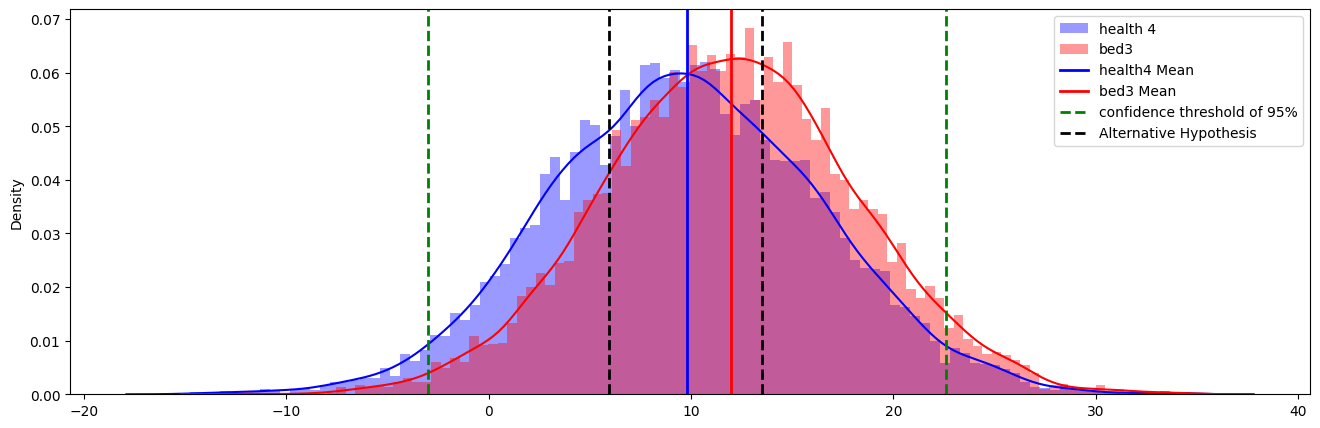

In [26]:
health4 = np.random.normal(μ_health4.qty.mean(), μ_health4.qty.std(), 10000)
bed3 = np.random.normal(μ_bed3.qty.mean(), μ_bed3.qty.std(), 10000)

ci = stats.norm.interval(0.95, loc=μ_health4.qty.mean(), scale=μ_health4.qty.std())
plt.figure(figsize=(16,5))
sns.distplot(health4, bins=100, color='blue', label='health 4')
sns.distplot(bed3, bins=100, color='red', label='bed3')

plt.axvline(μ_health4.qty.mean(), color='blue', linestyle='solid', linewidth=2, label='health4 Mean')
plt.axvline(μ_bed3.qty.mean(), color='red', linestyle='solid', linewidth=2, label='bed3 Mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(health4.mean()+ttest*health4.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(health4.mean()-ttest*health4.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

### Insight

berdasarkan uji hipotesis dan visualisasi grafik di atas tidak terdapat perbedaan rata - rata total penjualan yang signifikan antara produk dengan produk score yang tinggi dengan yang terendah.

# Catatan
- Tidak dilakukan pembersihan outliers pada kolom qty dikarenakan masuk akal jika ada perbedaan besar jumlah produk barang yang beli.

In [27]:
#Function to plot distribution
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

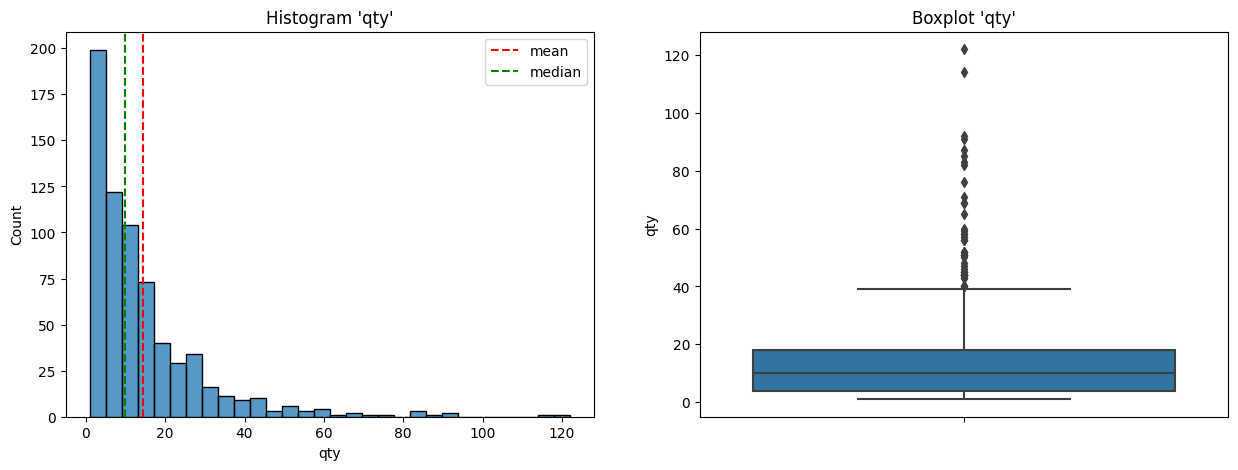

qty Kurtosis: 10.252169660358746
qty Skewness: 2.6735372986291748
Columns 'qty' right skewed


In [28]:
plot_dist(df_retail_price, 'qty')

# Kesimpulan Utama

Product score adalah sebuah nilai yang diberikan kepada sebuah produk untuk menentukan kualitas produk tersebut. Nilai dari product score bisa saja menjadi patokan customer untuk membeli suatu barang. Untuk itu akan dilakukan analisis apakah product score mempengaruhi dalam pembelian suatu produk. 

Sebelum melihat apakah ada hubungan antara product score dengan jumlah barang yang dibeli mari lihat terlebih dahulu kategori barang yang telah di totalkan masing - masing produknya yang telah terjual. Dari kesembilan category produk, tiga category yang memiliki total penjualan terbanyak berturut - turut adalah garden tools, health beauty dan watches gifts. Namun Apakah kategori dengan penjualan tertinggi sudah pasti memiliki pendapatan tertinggi juga? Dapat dilihat, kategori garden tools dengan total penjualan terbanyak berada pada posisi ketiga dalam urutan total pendapatan tertinggi. Hal ini berarti barang dengan penjualan tertinggi, tidak berarti memiliki pendapatan yang tinggi pula.

Selanjutnya dari kesembilan category product, nilai rata - rata product scorenya berada pada rentang 3,9 sampai 4,3. Dari product score tersebut akan dilihat apakah nilai product score mempengaruhi jumlah barang yang akan dibeli. Berdasarkan analisa, produk dengan product score yang tinggi hampir tidak mempengaruhi jumlah pembelian barang. Produk health4 dengan rating 4,5 memiliki jumlah penjualan yang tidak begitu berbeda yaitu 137 item terjual dengan produk bed3 dengan rating 3,3 dan produk terjual sebanyak 111 item.

Untuk Membuktikannya, akan diuji apakah produk health4 dengan product score paling tinggi memiliki perbedaan rata - rata total penjualan yang signifikan dengan produk bed3 dengan product score paling rendah. Data yang digunakan adalah data sample sebanyak 300 data. Berdasarkan uji hipotesis didapatkan bahwa tidak terdapat perbedaan yang signifikan antara rata - rata total penjualan produk dengan product score tertinggi dengan yang terendah.